In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [313]:
df=pd.read_csv("bmd_logistic_regression.csv")

In [314]:
df

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


## Preprocessing

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    object 
 7   waiting_time  169 non-null    int64  
 8   bmd           169 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.0+ KB


In [316]:
df.isna().sum()/len(df)*100

id              0.0
age             0.0
sex             0.0
fracture        0.0
weight_kg       0.0
height_cm       0.0
medication      0.0
waiting_time    0.0
bmd             0.0
dtype: float64

There are no null values in data

In [317]:
df.describe()

,id,age,weight_kg,height_cm,waiting_time,bmd
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,9102.556213,63.631531,64.665680,160.254438,19.739645,0.783104
std,8744.623598,12.356936,11.537171,7.928272,15.800570,0.166529
min,35.000000,35.814058,36.000000,142.000000,5.000000,0.407600
25%,2018.000000,54.424211,56.000000,154.000000,9.000000,0.670800
50%,6702.000000,63.487837,64.500000,160.500000,14.000000,0.786100
75%,17100.000000,72.080558,73.000000,166.000000,24.000000,0.888800
max,24208.000000,88.753795,96.000000,177.000000,96.000000,1.362400


In [318]:
# Checking garbage values in categorial column
cat_cols=df.select_dtypes("O").columns
cat_cols

Index(['sex', 'fracture', 'medication'], dtype='object')

In [319]:
for i in cat_cols:
    print(i,df[i].unique())

sex ['F' 'M']
fracture ['no fracture' 'fracture']
medication ['Anticonvulsant' 'No medication' 'Glucocorticoids']


so there are no garbage values to clean in dataset

## Visualization:

<AxesSubplot:xlabel='age'>

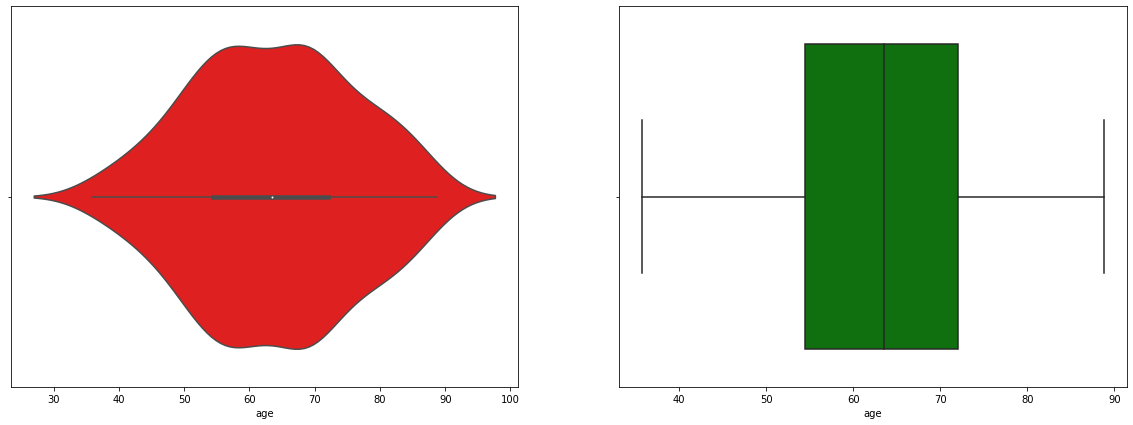

In [320]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,7))
sns.violinplot(df['age'],ax=ax1,color="red")
sns.boxplot(df['age'],ax=ax2,color="green")

### Insights:
    1. Above Chart shows the Distribution of Age variable.
    2. According to chart we can see that most of data is distributed between 45 to 75 age group. 

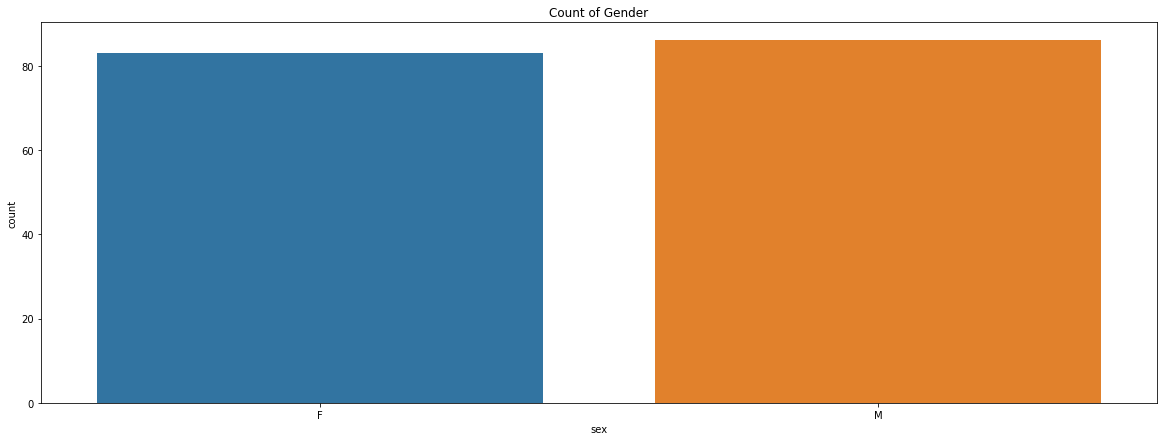

In [321]:
plt.figure(figsize=(20,7))
sns.countplot(df['sex'])
plt.title("Count of Gender")
plt.show()

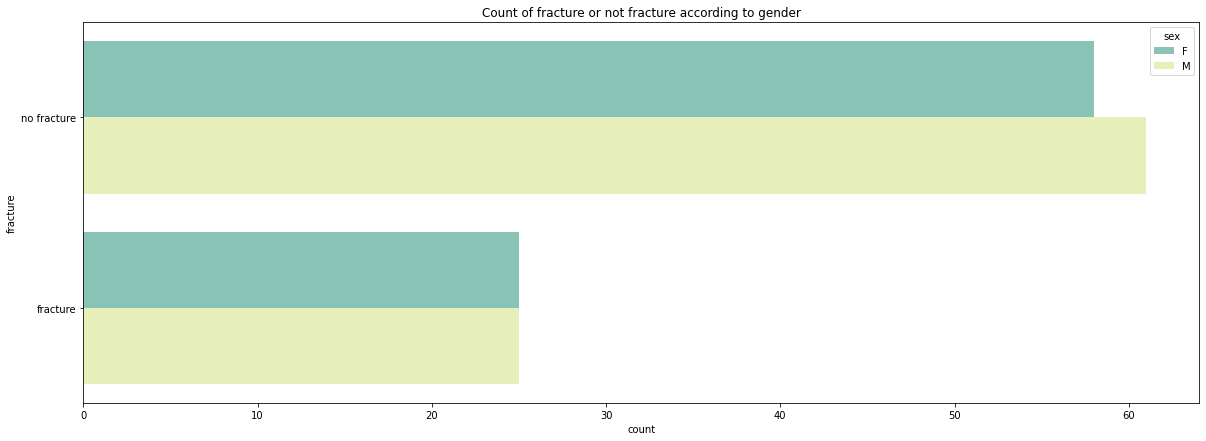

In [322]:
plt.figure(figsize=(20,7))
sns.countplot(y="fracture",hue="sex",data=df,palette= ["#7fcdbb", "#edf8b1"])
plt.title("Count of fracture or not fracture according to gender")
plt.show()

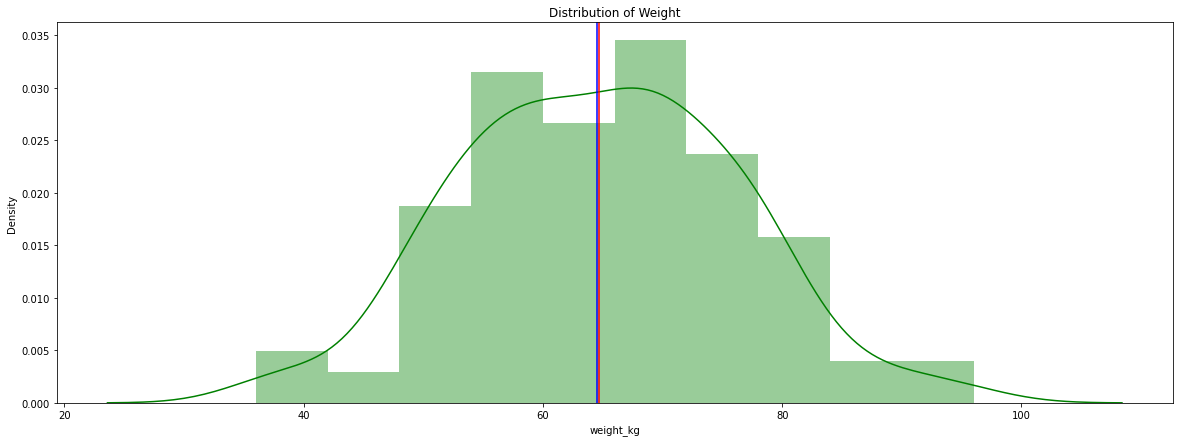

In [323]:
plt.figure(figsize=(20,7))
sns.distplot(df['weight_kg'],color="green")
plt.axvline(df['weight_kg'].mean(),color="red")
plt.axvline(df['weight_kg'].median(),color="blue")
plt.title("Distribution of Weight")
plt.show()

### Insights:
    1. Above chart shows the distribution of Weight in Kgs.
    2. According to axv lines in chart mean is equal to median.
    3. it means data is normally distributed.
    4. It is a Bell shaped curve.

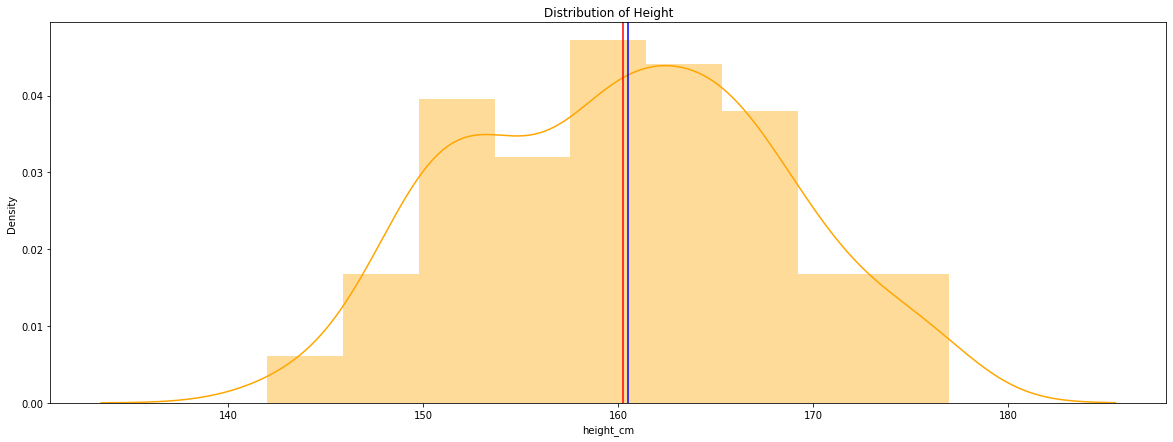

In [324]:
plt.figure(figsize=(20,7))
sns.distplot(df['height_cm'],color="orange")
plt.axvline(df['height_cm'].mean(),color="red")
plt.axvline(df['height_cm'].median(),color="blue")
plt.title("Distribution of Height")
plt.show()

### Insights:
    1. Above chart shows the distribution of Height in cm.
    2. According to axv lines in chart mean is almost equal to median.
    3. it means data is normally distributed.
    4. It is a Bell shaped curve.

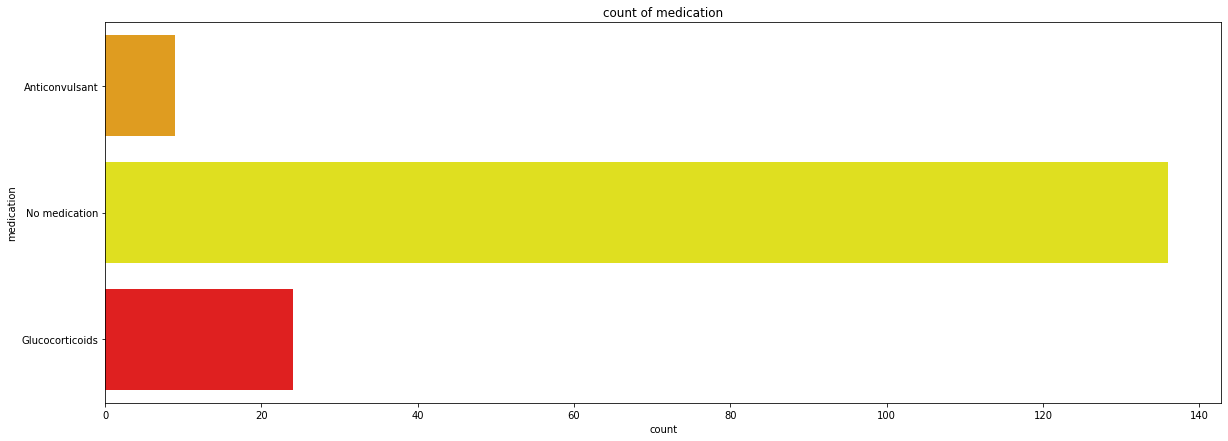

In [325]:
plt.figure(figsize=(20,7))
sns.countplot(y="medication",data=df,palette= ["orange", "yellow","red"])
plt.title("count of medication")
plt.show()

<AxesSubplot:xlabel='bmd'>

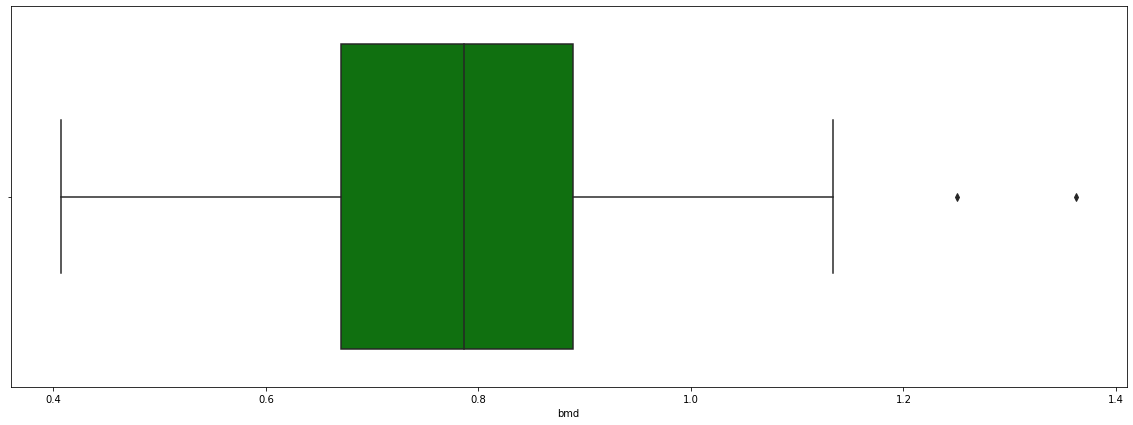

In [326]:
plt.figure(figsize=(20,7))
sns.boxplot(df['bmd'],color="green")

There are some outliers in bmd column.

In [327]:
# removing outliers from bmd

In [328]:
df=df[df['bmd']<1.2]

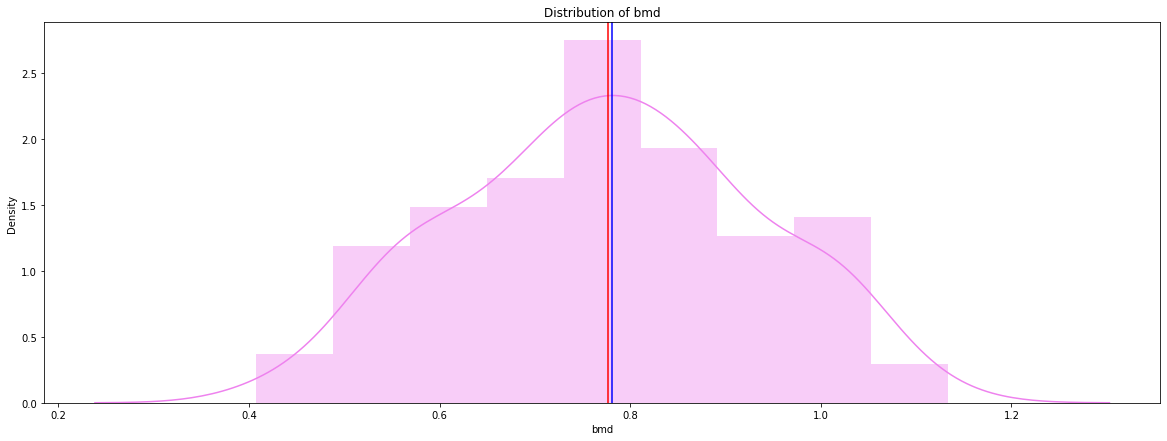

In [329]:
plt.figure(figsize=(20,7))
sns.distplot(df['bmd'],color="violet")
plt.axvline(df['bmd'].mean(),color="red")
plt.axvline(df['bmd'].median(),color="blue")
plt.title("Distribution of bmd")
plt.show()

### Insights:
    1. Above chart shows the distribution of bmd.
    2. According to axv lines in chart mean is almost equal to median.
    3. it means data is normally distributed.
    4. It is a Bell shaped curve.

In [330]:
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


## Encoding:

In [331]:
from sklearn.preprocessing import LabelEncoder

In [332]:
le=LabelEncoder()
for i in df.select_dtypes("O").columns:
    df[i]=le.fit_transform(df[i])

In [333]:
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,0,1,64.0,155.5,0,18,0.8793
1,8724,75.741225,0,1,78.0,162.0,2,56,0.7946
2,6736,70.778900,1,1,73.0,170.5,2,10,0.9067
3,24180,78.247175,0,1,60.0,148.0,2,14,0.7112
4,17072,54.191877,1,1,55.0,161.0,2,20,0.7909


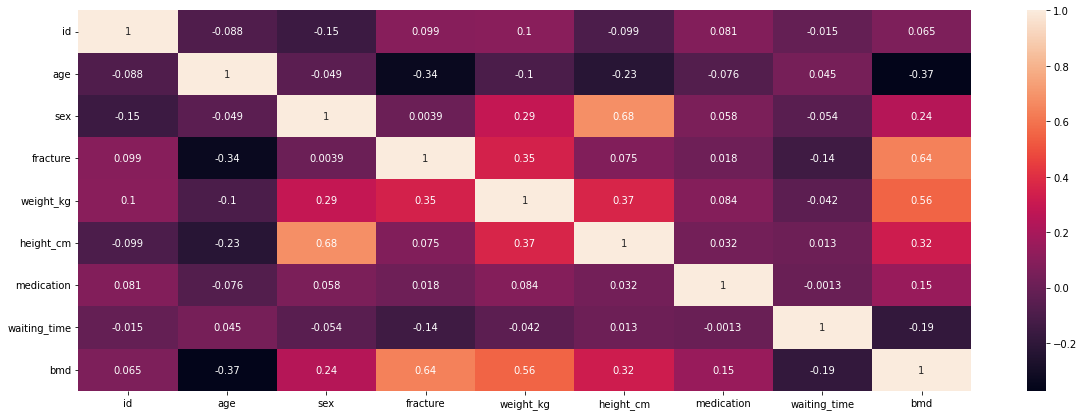

In [334]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Logistic Regression ( Feature: Fracture )

Taking Target variable Fracture which will predict fracture or no fracture

In [335]:
X=df.drop(["id","fracture"],axis=1)
y=df['fracture']

In [336]:
X.head()

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd
0,57.052768,0,64.0,155.5,0,18,0.8793
1,75.741225,0,78.0,162.0,2,56,0.7946
2,70.778900,1,73.0,170.5,2,10,0.9067
3,78.247175,0,60.0,148.0,2,14,0.7112
4,54.191877,1,55.0,161.0,2,20,0.7909


In [337]:
y

0      1
1      1
2      1
3      1
4      1
      ..
164    0
165    0
166    0
167    0
168    0
Name: fracture, Length: 167, dtype: int32

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [340]:
X_train.shape

(133, 7)

In [341]:
X_test.shape

(34, 7)

In [342]:
y_train.shape

(133,)

In [343]:
y_test.shape

(34,)

In [344]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [345]:
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

In [346]:
from sklearn.metrics import accuracy_score

In [347]:
print("Train Data")
print(accuracy_score(y_train,y_train_pred))
print("Test Data")
print(accuracy_score(y_test,y_test_pred))

Train Data
0.8195488721804511
Test Data
0.8529411764705882


In [348]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,roc_auc_score

In [349]:
print("train data")
print(classification_report(y_train,y_train_pred))
print("test data")
print(classification_report(y_test,y_test_pred))

train data
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        40
           1       0.82      0.96      0.88        93

    accuracy                           0.82       133
   macro avg       0.82      0.73      0.75       133
weighted avg       0.82      0.82      0.80       133

test data
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.88      0.92      0.90        24

    accuracy                           0.85        34
   macro avg       0.83      0.81      0.82        34
weighted avg       0.85      0.85      0.85        34



In [350]:
y_train_proba=reg.predict_proba(X_train)[:,1]
y_test_proba=reg.predict_proba(X_test)[:,1]

In [351]:
from sklearn.metrics import precision_recall_curve

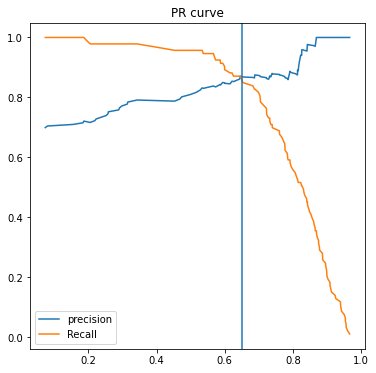

In [352]:
p,r,th=precision_recall_curve(y_train,y_train_proba)
plt.figure(figsize=(6,6))
plt.title("PR curve")
sns.lineplot(x=th,y=p[:-1],label="precision")
sns.lineplot(x=th,y=r[:-1],label="Recall")
plt.axvline(0.65)

## Linear Regression ( Feature: bmd )

Taking Target variable bmd which is continous.

In [353]:
X=df.drop(["id","bmd"],axis=1)
y=df['bmd']

In [354]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [355]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [356]:
y_train_pred=mlr.predict(X_train)
y_test_pred=mlr.predict(X_test)

In [357]:
from sklearn.metrics import r2_score,mean_squared_error

In [358]:
def model_performance(y_actual,y_pred):
    print("r2_score: ",r2_score(y_actual,y_pred),"|","RMSE: ",np.sqrt(mean_squared_error(y_actual,y_pred)) )

In [359]:
print("Train Performance")
print(model_performance(y_train,y_train_pred))
print("Test Performance")
print(model_performance(y_test,y_test_pred))

Train Performance
r2_score:  0.5960916272343184 | RMSE:  0.10087175375433459
None
Test Performance
r2_score:  0.5860384716069886 | RMSE:  0.09511601215112336
None
